In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from astropy.io import ascii

from matplotlib.patches import Rectangle

In [2]:
def F_nu(t_p,nu_p,F_nup,nu_sed):
    '''Calculates a Synchrotron Self-Absorbed Spectrum for given input parameters.
     axs
    Parameters:
    t_p (days): Time of SSA peak - should be single number
    nu_p (GHz): Frequency of SSA peak - should be single number
    F_nup (mJy): Flux of SSA peak - should be single number
    nu (GHz): Frequencies at which you want the SSA spectrum to be calculated at. Likely an array.
    
    Outputs:
    Fnu (mJy): the flux of the SSA. This is an array with values associated with each value of input array nu.
    '''
    
    m = 0.88 #using stAandard model m = (n-3)/(n-2)
    p = 3.0 #using standard model
    a = (2*m)+0.5
    b = (p+5-(6*m))/2
    t=t_p
    Fnu = F_nup*1.582*(t/t_p)**a*(nu_sed/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu_sed/nu_p)**(-(p+4)/2)))
    
    return Fnu


def SSA_props(t_p,nu_p,F_nup,D,f=0.5,alpha=1,vw=100,epsilon_b=0.9):
    '''Calculates Synchroton Self-Absorption properties for given input parameters.
    
    Inputs:
    t_p (days): Time of SSA peak - likely a single number
    nu_p (GHz): Frequency of SSA peak - likely a single number
    F_nup (mJy): Flux of SSA peak - likely a single number
    D (Mpc): distance to SN - likely a single number,while D_L is the luminosity distance
    f (unitless): filling factor (fraction of emitting region). default is 0.5
    alpha (unitless): ratio charged particles to magnetic field (epsilon_e/epsilon_b). default 1
    v_w (km/s): wind speed. default = 100
    epsilon_b (unitless): fraction of shock energy into B-fields. default = 0.1
    
    Outputs:
    R (cm): radius of material 
    B : magnetic field flux
    E : intermal energy of emitting material
    v (km/s): expansion velocity of material
    M (1d-5 solar masses per year): inferred mass loss rate of progenitor'''
     #angular distance
    D = D_L/((1+z)**2)

    #Radius
    R = 4.0e14*(alpha)**(-1./19.)*(f/0.5)**(-1./19.)*(F_nup)**(9./19.)*(D)**(18./19.)*(nu_p/5.)**(-1)

    # Magnetic field flux
    B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

    #Internal energy of the emitting material
    E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3.)

    #expansion velocity in km/s
    v = (R/t_p)*1.1574e-10

    #pre-explosion mass-loss in 1e- axs5 solar mass per year
    M = 1.0*(alpha)**(-8./19.)*(epsilon_b/0.1)*(f/0.5)**(-8./19.)*(F_nup)**(-4./19.)*(D)**(-4./19.)*(nu_p/5.)*(t_p/10.)*(vw/1000.)
    
   

    return R,B,E,v,M


def taufreefree(M,R,nu):
    '''Calculates the free free optical depth for a given set of parameters.
    
    Inputs:
    M (1d-5 solar masses per year): mass loss rate
    R (cm): radius of emitting material
    nu (GHz): Frequencies at which you want tau-ff to be calculated at. Likely an array.
    
    Outputs:
    tau_ff (unitless): the free-free optical depth, calculated at same frequences as input array nu'''

    Z_ave = 1  # Average metallicity 1= pure H. 5.4 for a massive star
    miu = 1 # mean molecular weight of electrons. 1= pure H  1.9 is for a massive star.
    vw_cgs = 100 * 1e5 # assumed wind velocity in cgs (cm/s). Take this as 1000 * 10^5 for now. (i.e. 1000 km/s in cgs)
    T = 10**4 # temperature of the material absorbing in K.  10^4 is a good starting point. 
        
    M_cgs =  M * 1e-5 * 6.307e+25 #mass loss rate in cgs units
    
    tau_ff = 2.021e25*M_cgs**2*Z_ave/(miu**2*nu**(2.1)*R**3*vw_cgs**2*T**(1.35))  
    
    return tau_ff

def den(M,R):
    vw_cgs = 100 * 1e5
    M_cgs =  M * 1e-5 * 6.307e+25 #mass loss rate in cgs units 
        #density of the CSM
    density = M_cgs/(4*3.142*R**2*vw_cgs)
    
    return density
#freqs,SED = F_nu(1224.288326 , 8,  0.0272)       
#R2,B2,E2,v2,M2 = SSA_props(1224.288326 , 8,  0.0272,880) 
#tauff=taufreefree(M2,R2,freqs)
#tauff=taufreefree(4,3e14,np.array([2,5,7]))
#print(freqs)
#print(tauff)
#print(R2,B2,E2,v2,M2)

<ipython-input-24-8fe34fcf5633>:87: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(-2,1*10**(9.5))


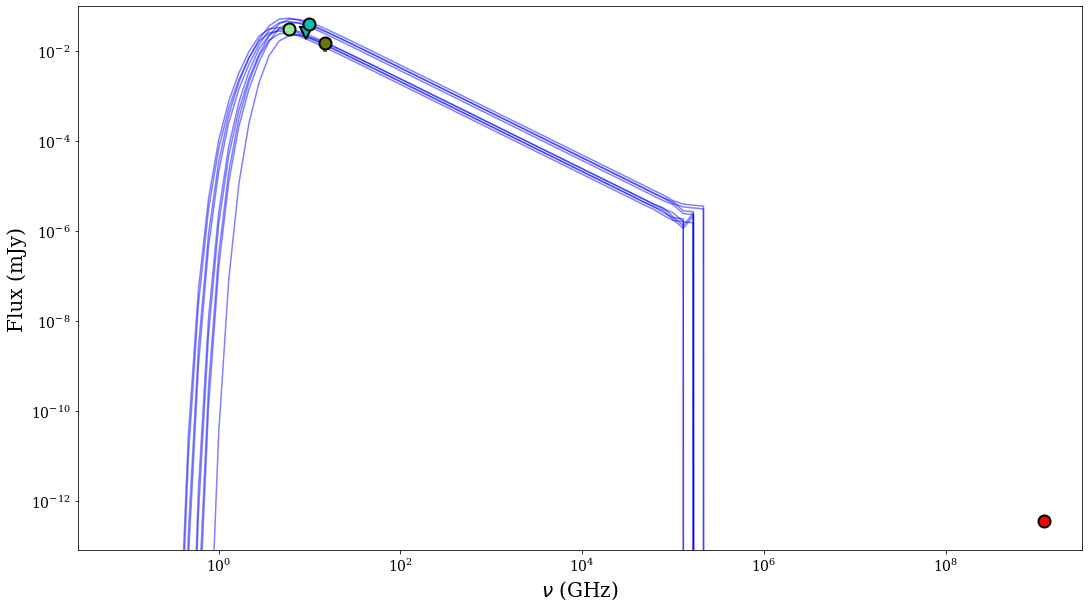

In [24]:

#plt.rc('text', usetex=True)
#plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
fig, ax = plt.subplots(figsize=(18,10)) 
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 15})
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
#figure, subplots = plt.subplots(1, 2, figsize=(18,10))
#figure.rcParams.update({'font.size': 10})
#fig = fig.add_subplot(111) 
#fig,subplots = plt.subplots(1, 1,figsize=(10,5), sharex='col', sharey='row',
 #                       gridspec_kw={'hspace': 0, 'wspace': 0})

#### LEFT:

plt.xscale('log')
plt.yscale('log')

file_in = 'PS11aop_grid_e1+5h.csv'
data_plot = ascii.read(file_in)
D_L = 1070.1 # distance to SN in Mpc
date_expl =  55770.562 - 5.5 #55736.161 #inferred explosion date
date_obs = 57307.08 # date that radio obs was taken
redshift = 0.218 # redshift of object
z = 0.218
t_p = (date_obs - date_expl)/(1+redshift) # time of observation in days #1261.509031#

file_in1 = 'PS11aop_grid_e2+5h.csv'
data_plot1 = ascii.read(file_in1)
index1 = np.where(data_plot1['RuledOut'] == 'False')[0]
data_plot1a = data_plot[index1]

#Allowed
indexa = np.where(data_plot['RuledOut'] == 'False')[0]
data_plota = data_plot[indexa]
index2a = np.where(data_plota['Radius'] < np.max(data_plot1a['Radius']))[0]
data_plota = data_plota[index2a]
index3a = np.where(data_plota['v_shock'] > np.min(data_plot1a['v_shock']))[0]
data_plota = data_plota[index3a]
#index4 = np.where(data_plot['Mdot'] > 0.85)[0]
#data_plot = data_plot[index4]
#index5 = np.where(data_plot['Mdot'] < 1.5)[0]
#data_plot = data_plot[index5]

Fcalc = data_plota['F_peak'][0:10]
nucalc = data_plota['nu_peak'][0:10]
nu_sed=np.logspace(np.log10(0.1),np.log10(1e10),num=100)

###Cycle over the SEDs to show######
for i in range(len(Fcalc)):
    #calculate SSA
    SSA_sed = F_nu(t_p,nucalc[i],Fcalc[i],nu_sed)
    
    #calculate Mass loss rate, Radius, velocity, etc.
    R,B,E,v,M = SSA_props(t_p,nucalc[i],Fcalc[i],D_L)

    #calculate tau_ff
    tauff = taufreefree(M,R,nu_sed)
        
    #Correct SED for FFA:
    SSA_FFA_sed = SSA_sed*np.exp(-tauff)
    
    #Plot it:
    plt.plot(nu_sed,SSA_FFA_sed,'b',zorder=1,alpha=0.5)

r1e = Rectangle((1,5e-3),1,0.095,color='coral',alpha=0.1,zorder=1)
r2e = Rectangle((2,5e-3),2,0.095,color='khaki',alpha=0.1,zorder=1)
r3e = Rectangle((4,5e-3),4,0.095,color='lightgreen',alpha=0.1,zorder=1)
r4e = Rectangle((8,5e-3),4,0.095,color='xkcd:turquoise',alpha=0.1,zorder=1)
r5e = Rectangle((12,5e-3),6,0.095,color='xkcd:olive',alpha=0.1,zorder=1)
#ax.add_patch(r1e)
#ax.add_patch(r2e)
#ax.add_patch(r3e)
#ax.add_patch(r4e)
#ax.add_patch(r5e)

#Overplot the data:
plt.errorbar(9.77,0.0405,0.0078,fmt ='o',color='xkcd:turquoise',markersize=12,elinewidth=4,markeredgecolor='k',markeredgewidth=2)#'ro', markersize=10)
plt.plot(1208995252,3.498773045601684*10**(-13),'o',color='red',markersize=12,markeredgecolor='k',markeredgewidth=2)#,elinewidth=4,markeredgecolor='k',markeredgewidth=2)#'ro', markersize=10)
#

plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) 
#subplots[0].title.set_text('PS1-11aop 2015B Observations')   
#plt.title.set_fontsize(16) 
plt.ylim(8e-14,1e-1)
plt.xlim(-2,1*10**(9.5))


D_L = 1070.1 # distance to SN in Mpc
date_expl =  55770.562 - 5.5 #55736.161 #inferred explosion date
date_obs = 57829.76513 # date that radio obs was taken
redshift = 0.218 # redshift of object
t_p = (date_obs - date_expl)/(1+redshift) # time of observation in days #1261.509031#
file_in2 = 'PS11aop_grid_e2+5h.csv'
data_plot = ascii.read(file_in2)


#Allowed
indexa = np.where(data_plot['RuledOut'] == 'False')[0]
data_plota = data_plot[indexa]

Fcalc = data_plota['F_peak'][0:10]
nucalc = data_plota['nu_peak'][0:10]
nu_sed=np.logspace(np.log10(0.1),np.log10(1e10),num=100)

###Cycle over the SEDs to show######
for i in range(len(Fcalc)):
    #calculate SSA
    SSA_sed = F_nu(t_p,nucalc[i],Fcalc[i],nu_sed)
    
    #calculate Mass loss rate, Radius, velocity, etc.
    R,B,E,v,M = SSA_props(t_p,nucalc[i],Fcalc[i],D_L)

    #calculate tau_ff
    tauff = taufreefree(M,R,nu_sed)
        
    #Correct SED for FFA:
    SSA_FFA_sed = SSA_sed*np.exp(-tauff)
    
    #Plot it:
    plt.plot(nu_sed,SSA_FFA_sed,'b',zorder=1,alpha=0.5)


plt.errorbar(6.0,0.0318,0.0095,fmt ='o',color='lightgreen',markersize=12,elinewidth=4,markeredgecolor='k',markeredgewidth=2)#'ro', markersize=10)
plt.plot(9.02,0.0258, 'v',color='xkcd:turquoise',markersize=12,markeredgecolor='k',markeredgewidth=2)
plt.errorbar(14.74,0.0155, 0.0056,fmt='o',color='xkcd:olive',markersize=12,elinewidth=4,markeredgecolor='k',markeredgewidth=2)#, markersize=10)


plt.savefig('test.png')
    

#subplots[0].text(1.1,0.04,'Allowed',color = 'b',fontsize=15,bbox={'facecolor': 'b', 'alpha': 0.2, 'pad': 5})
#subplots[0].text(1.1,0.03,'Not Allowed',color='r',fontsize=15,bbox={'facecolor': 'r', 'alpha': 0.2, 'pad': 5})
